# Finding the Best Markets to Advertise In

Our goal in this project is to find out the two best markets in which to advertise programming courses, mainly on web and mobile development but also data science, game development, etc.

To do that, we will use data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import seaborn as sns

In [50]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [51]:
#Let's see the number of rows and columns

survey.shape

(18175, 136)

In [52]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Let's see all column names

survey.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

Most column names are self-explanatory, but it seems that we do not have a clear documentation explaining each column name. However, we can find more information in the `raw-data` folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey) we mentioned above — we can find the initial survey questions, and from there it should be easy to infer what each column describes.

## Is the sample representative?

Most of the courses we would like to advertise are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We would like to know:

- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The `JobRoleInterest` column describes the role(s) each participant would be interested in working. Let's generate a frequency distribution table of the job roles respondees are interested in.

In [54]:
(survey['JobRoleInterest'].value_counts(normalize=True)*100)

Full-Stack Web Developer                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                    2.030892
  Mobile Developer                                                                                                                                                        1.673341
                                                                                                         

Frome the above we see that:

- people can be interested in more than one subject. It would be interesting to see how many are interested in just one and in more than one.
- a lot of people are interested in web development
- a few people are interested in mobile development

Let's try to visualise the different interests.

In [55]:
interests = survey['JobRoleInterest'].dropna()
splitted = interests.str.split(',')

n_jobs = splitted.apply(lambda x: len(x))
n_jobs.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It looks like 31.7% of all respondees have a clear goal set and are interested in just one job role. 

In [56]:
web_mobile = interests.str.contains('Web Developer|Mobile Developer')

table = web_mobile.value_counts(normalize=True)*100

print(table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


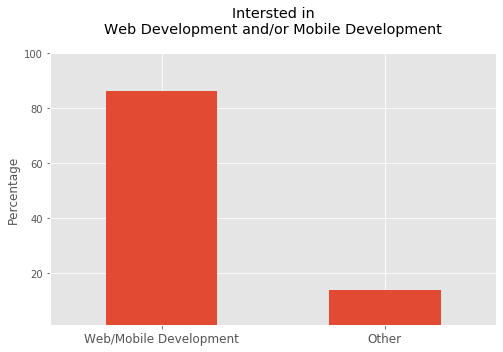

In [57]:
table.plot.bar(rot=360, figsize=(8,5))
plt.ylabel('Percentage', fontsize=12)
plt.title('Intersted in\nWeb Development and/or Mobile Development', y=1.05)
plt.ylim([1,100])
plt.xticks([0,1], ['Web/Mobile Development', 'Other'], fontsize=12)
plt.show()

In the above few cells we:

- removed those respondees who had not specified what job role they were intersted in.
- checked to see how many job roles the respondees were intersted in.
- it turned out that 31.7% had specified just one job interest which means that they had a clear goal on their mind when they filled in the survey.
- checked whether the respondees had mentioned Web and/or Mobile development as thir field of expertiese.
- it turned out that over 86% of all were interested in at least one of those fields.
- we visualised the result on a bar plot.

## New Coders - Locations and Densities

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we will work with the `CountryLive` variable because we are interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

To make sure we are working with a representative sample, let's drop all the rows where participants did not answer what role they are interested in. Where a participant did not respond, we cannot know for sure what their interests are, so it's better if we leave out this category of participants.

In [58]:
survey = survey[survey['JobRoleInterest'].notnull().copy()]

abs_freq = survey['CountryLive'].value_counts()
relv_freq = survey['CountryLive'].value_counts(normalize=True)*100

freq = pd.DataFrame(data={'Absolute Frequencies': abs_freq, 'Relative Frequencies': round(relv_freq, 2)})

freq

,Absolute Frequencies,Relative Frequencies
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
...,...,...
Trinidad & Tobago,1,0.01
Cameroon,1,0.01
Guatemala,1,0.01
Panama,1,0.01


It looks like the majority of respondees are located in the US, followed by India, the UK and Canada.

Let's try to get more in-depth information regardin how much money people are actually willing to spend studying.

## Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

Let's first create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

- we'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column.
- Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [59]:
#Let's first replace 0 with 1 in the 'MonthsPrograming' column
survey['MonthsProgramming'].replace(0, 1, inplace=True)

#Next, let's create a new column displaying the budget per month
survey['money_per_month'] = survey['MoneyForLearning']/survey['MonthsProgramming']
                                                            
#Let's see how mnay null values there are in the new colum
survey['money_per_month'].isnull().sum()

675

In [60]:
#Let's remove the rows which have a null value in the new column

survey = survey[survey['money_per_month'].notnull()]

In [61]:
#Let's remove any rows that have null values in the 'CountryLive' column

survey = survey[survey['CountryLive'].notnull()]

In [62]:
countries_mean = survey.groupby(['CountryLive']).mean()
countries_mean['money_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics, like GDP per capita, we would intuitively expect people in the UK and Canada to spend more on learning than people in India.

## Dealing with Extreme Outliers

It might be that we do not have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

In [63]:
four = survey[survey['CountryLive'].str.contains('United Kingdom|India|Canada|United States of America')]

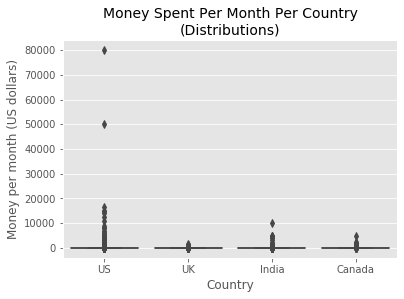

In [64]:
sns.boxplot(data=four, y='money_per_month', x='CountryLive')
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 14)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We immediately see that there are some extreme outliers for the US - people spending $50000+/month. Let's remove them.

In [65]:
four = four[four['money_per_month'] < 20000]

new_mean = four.groupby('CountryLive').mean()
new_mean['money_per_month']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: money_per_month, dtype: float64

Above we see the new monthly mean for the four countries we are interested in. Let's plot again and see if there still are some extreme outliers.

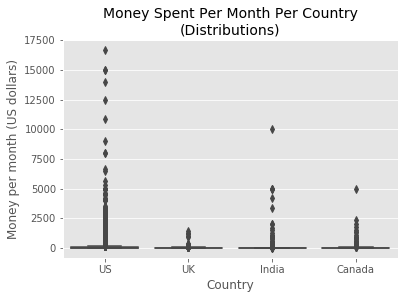

In [66]:
sns.boxplot(data=four, x='CountryLive', y='money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 14)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There is an extreme outlier for India - people spending over $2500 month for studying. However, it might be that those people have attended more than one bootcamp which tend to be expensive. Let's find out:

In [67]:
india_outliers = four[(four['CountryLive'] == 'India') & (four['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Those six people did not indicate that they had attended a bootcamp. It is hard to say whether they really spent the amounts they claim. It might be that they misunderstood the question. Let's remove them from the dataset.

In [68]:
four = four.drop(india_outliers.index)

Looking back at the boxplots, we see that there still are outliers for the US - with monthly spending over $6000. Let's have a look at them as well.

In [69]:
us_outliers = four[(four['CountryLive'] == 'United States of America') & 
                   (four['money_per_month'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Six out of the 11 outliers have attended bootcamps which explains the large amount of money spent per month. For the rest, it is hard to tell how they spent so much money on learning. Let's remove those outliers who have not attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably did not spend anything for the next couple of months after the survey). As a consequence, we will remove these eight outliers as well.

In the next cells, we will remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [70]:
no_bootcamp = us_outliers[us_outliers['AttendedBootcamp'] == 0]

four = four.drop(no_bootcamp.index)

In [71]:
less_than_three = us_outliers[(us_outliers['MonthsProgramming'] <= 3) & us_outliers['AttendedBootcamp'] == 1]

four = four.drop(less_than_three.index)

If we go back to the boxplot, we see that there is one outlier for Canada. Let's have a closer look.

In [72]:
ca_outlier = four[(four['CountryLive'] == 'Canada') & (four['money_per_month'] > 4000)]
ca_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


That person did attend a bootcamp - Bloc.io which costs over $24000. So, the respondent most probably spent a large sum of money on the first month and afterwards did not spend any money for the next few months. Let's remove that outlier.

In [73]:
four = four.drop(ca_outlier.index)

Let's once again calculate the mean values and create a boxplot.

In [74]:
final_means = four.groupby('CountryLive').mean()
final_means['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

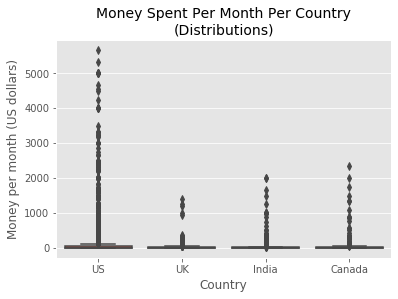

In [75]:
sns.boxplot(data=four, x='CountryLive', y='money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 14)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two Best Markets

It has now become clear that the US should be one of the markets we need to focus on - the majority of the respondents live there and on average they are willing to spend the most money per month for learning.

The UK, however, does not seem like a proper fit for our product. Our subscription costs 59 USD whereas, on average, UK respondents are willing to spend 45 USD per month for learning.

Before we choose between India and Canada for the second market, let's have a second look at them.

In [76]:
four['CountryLive'].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Due to the larger number of new coders from India, it seems like a good idea to choose it as a second country to advertise in. However, Canada also seems like a good fit. It might be a good idea to revisit our budget and find a way to split it three ways between those countries.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.